# Projet Python WordCloud Henri et Vincent

## 1. Introduction

### 1.1. Présentation du projet

L’objectif est d’**observer l’évolution de la crise du coronavirus à travers l’analyse des discours du président Macron**. Pour que cette analyse soit vraiment la plus précise et la moins biaisée possible, nous avons choisis de sélectionner uniquement les discours sous la forme d'adresse aux Français et qui sont recensés sur le site de l'Elysée. Ces discours ont l'avantage d'avoir le même public visé, la même forme et même le même lieu. Nous avons donc un corpus de 9 discours entre le 12 Mars 2020 et le 9 Novembre 2021. Ces textes devraient donc être particulièrement pertinent pour observer l'évolution de la crise. Pour mener notre analyse il s’agira d’**extraire les mots clés** de ces discours (text clouds). Pour cela, il nous faudra coder en Python un wordcloud. L'objectif est d'arriver au terme de ce projet à quelque chose de cette forme.

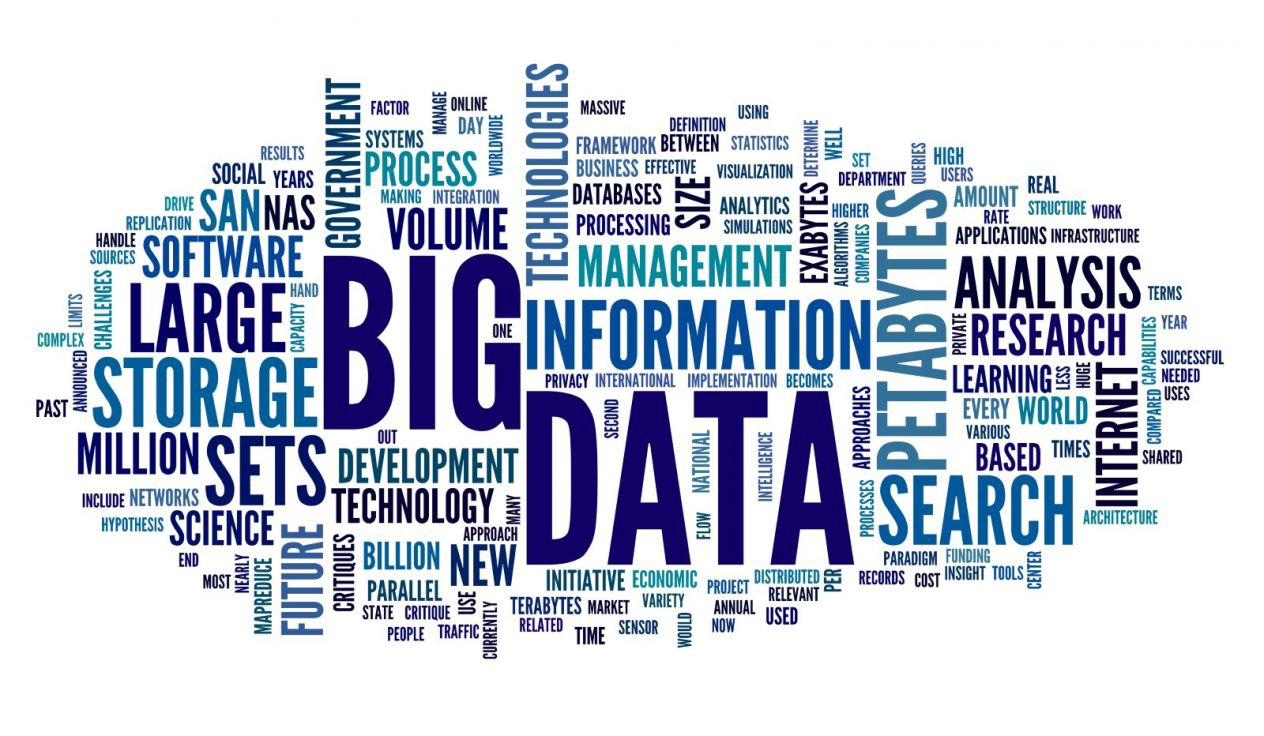

Avec un WordCloud pour les différents discours d'Emmanuel Macron depuis le début de la crise, nous serons capable de voir **l'évolution de sa stratégie de communication**.

### 1.2. Méthodologie

Il y a **plusieurs méthodes pour coder un wordcloud** i.e. un algorithme qui extrait les mots clés d’un texte et les représente. 

La plus simple est de faire **un ranking des mots utilisés en fonction de leur fréquence d’apparition**. Cette méthode naïve de ne pas faire la différence entre des mots différents désignant pourtant la même chose. Par exemple, cette méthode ne fera pas la différence entre "français" et "française". Ces deux mots seront comptés comme différents car ils ont des accords différents. Pourtant, ils désignent la même idée : l'auteur du texte s'adresse aux Français. Pour qu'un WordCloud soit pertinent, il faudrait que, dans une telle situation, le programme prenne en compte que le mot "français" est apparu deux fois. Pour parvenir à cela, il nous faudra ajouter à la méthode de ranking simple **des méthodes de racinisation**. 

En outre, le ranking simple présente aussi l’inconvénient d’accorder **une importance démesurée aux petits mots** (« de », « et », etc). On peut les supprimer en implémentant des "**stopwords**", mais le WordCloud ne sera toujours pas réellement pertinent, dans la mesure où, s'il y a bien des mots qui seront des stopwords peu importe le texte (comme, par exemple, les déterminants), d'autres ne le seront que dans certains contextes. Prenons par exemple le verbe être à l'infinitif. Dans un texte où des consignes sont données, il peut être énormément présent à travers des formulations comme 'il faudra être particulièrement vigilant à ...'. Dans ce premier cas il n'est pas pertinent de le faire apparaitre sur le WordCloud. Par contre dans un texte philosophique sur l'Être, le mot apparaitra aussi souvent mais il est pertinent de le mettre sur le WordCloud. Il faut donc **pondérer les fréquences d’apparition des mots en fonction d’une moyenne de leur apparition dans un corpus de textes représentatifs de l’usage usuel de ces mots**. C’est **la méthode TF-IDF** que nous utiliserons pour affiner notre WordCloud.

## 2. Les méthodes d'analyse

### 2.1. Une première méthode : une approche naïve d'un texte non nettoyé, non racinisé.

Il faut tout d'abord **enregistrer le fichier au format .txt dans le même document que le fichier au format .ipynb**.

La **première méthode** est très naïve. On construit le WordCloud à partir d'un dictionnaire construit avec les mots d'un texte que l'on détermine à l'aide de **la fonction re.findall de la bibliothèque re**, qui permet de manipuler des expressions régulières en python, et d'une représentation graphique 

Pour la représentation graphique, il faut **importer les bibliothèques wordcloud** (si elle n'est pas installée, il faut se rendre dans Anaconda pour la rentrer dans l'environnement) **et matplotlib**. **La fonction generate_from_frequencies** de cette bibliothèque permet d'avoir une représentation graphique à partir d'un dictionnaire avec les mots en clés et leur fréquence dans le texte en valeur. 

In [2]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

On obtient ainsi les fonctions suivantes :

- la fonction ***dictionary0*** prend en appel un nom (au format str) de discours enregistré au format txt dans le même document que ce notebook.


- la fonction ***wordcloud*** prend en appel un nom de discours et une méthode de dictionnaire (ici, la méthode dictionary1) et renvoie le WordCloud obtenu à partir des fréquences de cette méthode.

**La fonction re.findall**  va chercher dans une chaîne de caractères (ici, le texte) les suites de caractères (les mots) vérifiant une certaine contrainte (cela permet de ne pas avoir à se soucier de la ponctuation).

In [3]:
def dictionary1(speech_name):
    
    # ce passage permet d'ouvrir le texte au format txt et de le rentrer dans speech en tant que chaîne de caractère
    with open(f'./{speech_name}.txt','r') as f:
        speech = f.read()
        speech = speech.lower()
        
    # on commence la construction du dictionnaire qui contient les mots en clés et leur fréquence dans le texte en valeur
    dictionary = {}
    for word in re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', speech): 
        if word not in dictionary:
             dictionary[word] = len(re.findall(word,speech))
    return dictionary

def wordcloud(speech_name,dictionary):
    wordcloud = WordCloud(max_font_size = 100)
    dictionary_aux = lambda x: dictionary(x)
    wordcloud.generate_from_frequencies(dictionary_aux(speech_name))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
print('Voici le WordCloud obtenu avec la première méthode :')
wordcloud('discoursmacron12mars2020', dictionary1)

Voici le WordCloud obtenu avec la première méthode :


FileNotFoundError: [Errno 2] No such file or directory: './discoursmacron12mars2020.txt'

On constate que **le WordCloud obtenu avec la première méthode est très mauvais**. En effet, il ne met aucunement en valeur les mots clés du discours de Macron du 31 mars 2020 car accorde **une importance démesurée aux petits mots** très fréquents dans la langue française ("que", "les", "qui"...).

On importe également **le package time** pour faire une analyse comparative du coût algorithmique de cette méthode.

Nous le ferons dorénavant pour toutes les méthodes de traitement de texte.

In [3]:
import time

debut = time.time()
dictionary_test = dictionary1('discoursmacron16mars') 
# corpusdiscoursmacron est un fichier txt suffisamment lourd pour avoir une bonne estimation du coût algorithmique
fin = time.time()
print(f'Le coût algorithmique de la première méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la première méthode est de 0.055 secondes pour 1000 mots


### 2.2. Une deuxième méthode : une approche trop rapide qui brûle les étapes.

Après quelques recherches, nous nous rendons compte qu'**il manquait plusieurs étapes nécessaires** à notre première méthode : 

- **le nettoyage du texte** avec le retrait des stopwords, ces petits mots parasites qui prennent une importance démesurée alors qu'ils n'apportent pas de signification particulière,


- **la racinisation du texte** qui permet de regrouper les mots par origine sémantique afin d'accorder une importance plus importante au sens dans la construction du wordcloud.

Il faut donc d'abord nettoyer et raciniser le texte avant de l'exploiter dans un dictionnaire pour étudier la fréquence des termes. Nous allons donc créer une autre fonction, **cleaner_text2** ("2" pour la deuxième méthode), qui prend en appel le nom d'un texte enregistré au format txt et sort le texte nettoyé et racinisé en format liste. 

Pour cela, **nous importons les bibliothèques Python qui nous semblent nécessaires**, un petit peu à tâtons, pour réaliser notre fonction : **le set de stopwords français** et les fonctions de tokenisation (**nltk.word_tokenize**, pour mettre le texte en format list) et de racinisation (**nltk.WordNetLemmatizer**, pour regrouper ensuite les mots par racine commune lors de la création du dictionnaire) du **package nltk**.

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import re

# On ajoute au set de stopwords les mots parasites qui nous semblent manquer
stop_words = set(stopwords.words('french'))
stop_words.add('les')
stop_words.add('a')
stop_words.add("l'")
    
def cleaner_text2(speech):
    with open(f'./{speech}.txt', 'r') as f:
        speech = f.read()
    
    speech = speech.lower()
    pattern = r'[^a-zA-z0-9\s]'
    speech = re.sub(pattern, '', speech)
    speech_tokens = nltk.word_tokenize(speech)
    words = [w for w in speech_tokens if not w in stop_words]
    words_lemmatize = nltk.WordNetLemmatizer()
    
    return ([words_lemmatize.lemmatize(t) for t in words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/barnabemerlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


On affiche ici les premières lignes du discours prononcé par E. Macron le 16 mars traité avec la fonction cleaner_text1.

In [5]:
cleaner_text2('discoursmacron16mars')[:10]

['franaises',
 'franais',
 'jeudi',
 'soir',
 'adress',
 'voquer',
 'crise',
 'sanitaire',
 'traverse',
 'pay']

On voit bien que **ce traitement de texte n'est pas idéal** (le mot "pays" devient "pay" et certains caractères spéciaux ont disparu comme le "ç" de "français"), mais voyons quand même ce que ça donne dans un WordCloud.

Pour réaliser le WordCloud, il faut **d'abord créer un dictionnaire** qui contient les mots du discours en clés et leur fréquence en valeurs. La fonction dictionary va ainsi prendre en appel un texte et une méthode de traitement de texte (la deuxième, la troisième, etc.) pour sortir **le dictionnaire des fréquences** obtenu à partir du texte traité avec cette méthode. Ensuite, **on redéfinit la fonction wordcloud** pour qu'elle prenne en compte la méthode utilisée.

Voici le WordCloud obtenu avec la deuxième méthode pour le discours du Président le 16 mars 2020 :


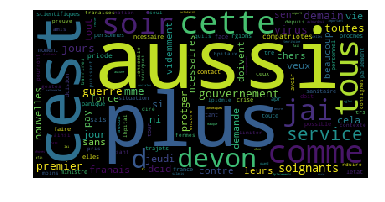

In [6]:
def dictionary(speech_name, cleaner_text): # on choisit la fonction de nettoyage et racinisation cleaner_text
    dictionary = {}
    cleaner_text_aux = lambda x: cleaner_text(x)
    speech = cleaner_text_aux(speech_name)
    for word in speech:
        frequency = 0
        if word not in dictionary:
            for word_aux in speech:
                if word == word_aux: # à un mot, Python associe un numéro, donc il peut les comparer
                    frequency += 1
            dictionary[word] = frequency
    return dictionary

def wordcloud(speech_name, cleaner_text_method):
    wordcloud = WordCloud(max_font_size = 100)
    wordcloud.generate_from_frequencies(dict(dictionary(speech_name, cleaner_text_method)))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print('Voici le WordCloud obtenu avec la deuxième méthode pour le discours du Président le 16 mars 2020 :')
wordcloud('discoursmacron16mars', cleaner_text2)

Ce WordCloud révèle **les nombreux défauts de notre première fonction qui nettoie et racinise le texte**.

En effet, les apostrophes et les accents ont disparu et certains mots sont sous forme de racine, ce qui crée **des mots inexistants dans le dictionnaire** (comme "devon" ou "cest") et ne rend pas du tout la chose agréable : ce n'est pas ce que nous voulons. 

Nous aurions également pu avoir **une représentation sous forme de tableau à deux colonnes avec les mots et leur fréquence**.

Nous détaillons ci-dessous une fonction qui permet de créer ce tableau à l'aide de **la bibliothèque Panda** (utile pour visualiser des résultats) et d'afficher ses cinq premières lignes.

In [7]:
import pandas as pd

def dictionary_dataframe(speech_name, cleaner_text_method):
    dictionary_dataframe = dictionary(speech_name, cleaner_text_method)
    Dataframe = pd.DataFrame(list(dict(dictionary_dataframe).items()), columns=['Words', 'Frequency']).head()
    # list(dictionary.items()) où dictionary est un dictionnaire de tuples renvoie une matrice à deux colonnes
    return Dataframe

Voyons ce que cela rend :

In [8]:
dictionary_dataframe('discoursmacron16mars', cleaner_text2)

,Words,Frequency
0,franaises,3
1,franais,6
2,jeudi,6
3,soir,11
4,adress,1


Cette fonction dictionary_dataframe ne marche pas bien car elle affiche les cinq premiers mots clés du dictionnaire et leur fréquence associée alors qu'**elle devrait afficher les cinq mots les plus fréquents pour être pertinente**.

Il faut donc **implémenter une fonction sorted_dictionary** qui prend en appel un dictionnaire et le trie pour ensuite **redéfinir la fonction dictionary_dataframe**. Nous avons trouvé une fonction sur dans nos recherches qui permet de le faire.

In [9]:
def sorted_dictionary(dictionary):
    return sorted(dictionary.items(), key = lambda t: t[1])

dictionary_test = sorted_dictionary(dictionary('discoursmacron16mars', cleaner_text2))[:20]
print(dictionary_test)

[('adress', 1), ('voquer', 1), ('traverse', 1), ('jusqualors', 1), ('tait', 1), ('peuttre', 1), ('ide', 1), ('lointaine', 1), ('devenue', 1), ('ralit', 1), ('immdiate', 1), ('pressante', 1), ('disposition', 1), ('freiner', 1), ('collges', 1), ('lyces', 1), ('universits', 1), ('samedi', 1), ('commerce', 1), ('nonessentiels', 1)]


On se rend compte que **cette fonction sorted_dictionary trie dans l'ordre croissant**. Ce n'est pas ce que nous voulons pour avoir une représentation des mots les plus fréquents dans le texte. On recrée ainsi la fonction sorted_dictionary pour qu'elle trie dans l'ordre croissant des valeurs des clés, cette fois en parcourant les clés du dictionnaire.

In [10]:
def sorted_dictionary(initial_dictionary):
    
    # Trier un dictionnaire nécessite de passer par une liste de tuples.
    tuples_dictionary = []
    for word in initial_dictionary:
        tuples_dictionary.append((word, initial_dictionary[word]))
    # tuples_dictionary est une liste de tuples comportant la clé (le mot) et la valeur (la fréquence).
    
    for tuple_position in range(1,len(tuples_dictionary)):
        iteratif = tuples_dictionary[tuple_position] 
        aux = tuple_position
        # On compare maintenant la fréquence d'un mot (iteratif[1]) avec celle de ses précédents dans la liste de tuples.
        # Tant qu'elle est plus grande, il prend sa place !
        while aux > 0 and iteratif[1] > tuples_dictionary[aux - 1][1]:
            tuples_dictionary[aux] = tuples_dictionary[aux - 1]
            aux -= 1
            tuples_dictionary[aux] = iteratif
    # A ce stade, tuples_dictionary contient la liste de tuples triées par fréquence dans une liste.
            
    # Enfin, on recrée un dictionnaire trié.
    final_dictionary = {}
    for word in range(len(tuples_dictionary)):
        final_dictionary[tuples_dictionary[word][0]] = tuples_dictionary[word][1]
    
    return final_dictionary

On peut désormais **redéfinir dictionary_dataframe** et afficher les cinq mots les plus fréquents du discours du Président E. Macron le 16 mars d'après la deuxième méthode !

In [11]:
def dictionary_dataframe(speech_name, cleaner_text_method):
    dictionary_dataframe = sorted_dictionary(dictionary(speech_name, cleaner_text_method))
    Dataframe = pd.DataFrame(list(dict(dictionary_dataframe).items()), columns=['Words', 'Frequency']).head()
    # list(dictionary.items()) où dictionary est un dictionnaire de tuples renvoie une matrice à deux colonnes
    return Dataframe

dictionary_dataframe('discoursmacron16mars', cleaner_text2)

,Words,Frequency
0,aussi,23
1,plus,19
2,cest,13
3,comme,12
4,tous,12


On retrouve donc bien les cinq mots les plus importants du WordCloud !

#### Analyse de la complexité de l'algorithme de tri :

Attelons nous désormais à faire **une analyse de la complexité de l'algorithme de tri** définit dans la fonction sorted_dictionary. Nous revenons d'abord sur les différentes étapes de l'algorithme puis nous en considérons un en particulier pour calculer le nombre d'opérations nécessaires.

**1. Les différentes étapes de l'algorithme.**

Cette fonction crée **une liste de tuples** (tuples_dictionary) composés d'un mot et de sa fréquence dans le texte. Il s'agit de **trier ces tuples selon la fréquence du mot** (le deuxième élément). L'algortithme procède de la façon suivante : 

* on parcourt tuples_dictionary du deuxième élément jusqu'au dernier,
* pour chaque élément rencontré, par exemple celui en k-ième position (tuples_dictionary[k]), on sait que tuples_dictionary[0:k-1] est bien trié,
* on insère donc le l'élément tuples_dictionary[k] à sa place dans la liste tuples_dictionary[0:k] qui est désormais triée !

Pour la dernière étape, on compare le deuxième élément du k-ième tuple (soit la fréquence) avec le deuxième élément de tous les tuples précédents jusqu'à ce qu'on tombe sur un plus petit. Tant qu'on ne tombe pas sur un plus petit, le k-ième tuple se décale.

**2. La complexité algorithmique.**

Soit un dictionnaire à n clés pour un texte dont on retient n mots (après nettoyage et racinisation).

Comme trier un dictionnaire nécessite, d'après nos recherches, de passer par une liste, nous n'allons pas prendre en compte la création de la liste puis la création finale du dictionnaire dans notre code (celles-ci représentent à chacunes n opérations) car elles ont la même complexité quelle que soit le texte. On concentre plutôt notre analyse sur **la boucle for** qui contient **une boucle while** car, à ce niveau là, **la complexité peut varier suivant l'état initial du dictionnaire** :

* lorsque le dictionnaire à n clés est déjà rangé en ordre décroissant, la fonction sorted_dictionary va entrer n-1 fois dans la boucle for donc l'algorithme effectue n-1 opérations (la première boucle while est vérifiée !) : c'est le moins d'opérations qu'il puisse faire.
* en revanche, lorsque le dictionnaire à n clés est rangé par ordre croissant, la fonction sorted_dictionary va entrer n-1 fois dans la boucle for et à chaque fois, dans la boucle while, va redescendre toute la liste pour trouver la place du k-ième élément donc faire **k-1 comparaisons** soit la somme pour k (le mot) allant de 2 à n de k-1 donc $n(n-1)/2$ opérations.

Pour considérer la complexité d'un algortithme, **on prend la pire possible** donc on a : la complexité est de l'ordre de $n^2/2$ opérations !

Voici une fonction qui calcule la complexité de l'algorithme. Bien entendu, nous n'utiliserons pas cette fonctin après car elle est plus complexe à cause du compteur... Il suffit de rentrer une deuxième variable qui n'est pas "None" comme "afficher complexité" (type str) pour que cette fonction sorted_dictionary_complexité resorte le dictionnaire trié et l'analyse de la complexité.

In [12]:
def sorted_dictionary_complexité(initial_dictionary, complexité = None):
    
    # Trier un dictionnaire nécessite de passer par une liste de tuples.
    tuples_dictionary = []
    for word in initial_dictionary:
        tuples_dictionary.append((word, initial_dictionary[word]))
    # tuples_dictionary est une liste de tuples comportant la clé (le mot) et la valeur (la fréquence).
    
    n = len(tuples_dictionary)
    complexite = 0
    
    for tuple_position in range(1,len(tuples_dictionary)):
        complexite += 1
        iteratif = tuples_dictionary[tuple_position] 
        aux = tuple_position
        # On compare maintenant la fréquence d'un mot (iteratif[1]) avec celle de ses précédents dans la liste de tuples.
        # Tant qu'elle est plus grande, il prend sa place !
        while aux > 0 and iteratif[1] > tuples_dictionary[aux - 1][1]:
            complexite += 1
            tuples_dictionary[aux] = tuples_dictionary[aux - 1]
            aux -= 1
            tuples_dictionary[aux] = iteratif
    # A ce stade, tuples_dictionary contient la liste de tuples triées par fréquence dans une liste.
            
    # Enfin, on recrée un dictionnaire trié.
    final_dictionary = {}
    for word in range(len(tuples_dictionary)):
        final_dictionary[tuples_dictionary[word][0]] = tuples_dictionary[word][1]
    
    if complexité is not None:
        print(f'La complexité relative de cette algorithme est de {round(complexite / n,3)} opérations par mot.')
        print (f'Il réalise, en effet, {complexite} opérations pour une longueur initiale du dictonnaire de {n}.')

print("Voici la complexité pour le tri du discours du Président le 16 mars 2020 :")
sorted_dictionary_complexité(dictionary("discoursmacron16mars", cleaner_text2), "affichercomplexité")

Voici la complexité pour le tri du discours du Président le 16 mars 2020 :
La complexité relative de cette algorithme est de 65.692 opérations par mot.
Il réalise, en effet, 54196 opérations pour une longueur initiale du dictonnaire de 825.


Revenons à notre fonction cleaner_text2 !

On remarque bien que **cette fonction de nettoyage et racinisation cleaner_text2 n'est pas bonne** !

Elle nous a cependant permis de **nous rendre compte des difficultés que nous allions devoir surmonter** pour arriver à une liste de mots exploitables. Nous comprenons aussi que les lemmatizer fournis par le package nltk sont loin d'être parfaits et hâchent beaucoup de mots un peu aléatoirement. **Nous décidons alors de mettre de côté la phase de racinisation pour plus tard pour nous concentrer d'abord sur le nettoyage** dans une troisième méthode.

Mais d'abord, voici **le coût algorithmique de la deuxième méthode**. Cette méthode prend plus de temps que la première, ce qui est normal comme elle nettoie et racinise le texte.

In [13]:
debut = time.time()
dictionary_test = dictionary('discoursmacron16mars', cleaner_text2) 
fin = time.time()
print(f'Le coût algorithmique de la deuxième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la deuxième méthode est de 0.065 secondes pour 1000 mots


### 2.3. Troisième méthode : amélioration du nettoyage.

**La première chose à corriger pour le nettoyage est la conservation des caractères spéciaux indispensables à la compréhension de la langue française**. Typiquement, nous ne voulons pas que le mot "français" devienne "francais" après avoir été nettoyé. **C'est le pattern qu'il faut améliorer**, puisqu'il donne l'instruction de ne conserver que les lettres minuscules ("a-z"), majuscules ("A-z") et les espaces ("\s").

Posons alors un nouveau pattern tel que :

In [14]:
pattern = r"[^\wéèçàù\s'-]" # veuillez bien exécuter cette commande s'il vous plaît.

Désormais, grâce à l'importation de la bibliothèque "re", le programme a toujours l'instruction de conserver les lettres, cette fois travers la commande "\w", **mais aussi tous les caractères spéciaux** ("éèçàù'-") !

Ensuite, comme nous l'avons déjà vu, pour avoir une liste de mots exploitable, il faut **enlever les mots trop courants afin d'obtenir un WorldCloud pertinent**. Les déterminant comme "le" ou "la" par exemple ressortent par exemple de manière beaucoup trop importante alors qu'ils ne donnent aucune information sur le texte. Nous importons donc **les stopwords de la bibliothèque nltk** et ajoutons ceux qui nous semblent manquer, comme ci-dessous.

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
stop_words.add('les')
stop_words.add('a')
stop_words.add("l'")
stop_words.add("d'")
stop_words.add("c'")
stop_words.add("m'")
stop_words.add("n'")
stop_words.add("s'")
stop_words.add("t'")
stop_words.add("j'")
# Nous rajoutons les mots "aussi" et "cette" aux stopwords car nous nous sommes rendus compte que c'était un tic de language de E. Macron.
# Il commence de nombreuses phrases par "aussi" et parle tout le temps de la cris comme "cette crise", cela faussait les WordCloud
stop_words.add("aussi")
stop_words.add("cette")

Des recherches effectuées nous indiquent ensuite que **la bibliothèque SpaCy représente de gros volumes de données pour la langue française**. Nous chargeons alors SpaCy sur notre ordinateur et remplaçons notre commande de tokenisation par une commande plus direct (**la fonction nlp()**). Cela peut prendre un petit peu de temps...

In [16]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download fr_core_news_sm
import fr_core_news_sm
nlp = fr_core_news_sm.load()

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [19]:
# Fonction auxiliaire :

def speech_token(sentence):
    doc = nlp(sentence)
    return[X.text for X in doc]

# Fonction principale :

def cleaner_text3(speech_name): 
    
    with open(f'./{speech_name}.txt','r') as f:
        speech = f.read()
      
    # on tokénise le texte
    speech = speech.lower()
    speech = re.sub(pattern, '', speech) # la fonction r.sub remplace ce qui n'est pas dans le pattern par des espaces
    speech = speech_token(speech)
    
    # on enlève les stopwords du texte
    cleaner_text = []
    for token in speech:
        if token not in stop_words:
            cleaner_text.append(token)
    
    return cleaner_text

print('Voilà un exemple des premières lignes du discours du Président le 16 mars nettoyé, non racinisé :')
cleaner_text3('discoursmacron16mars')[:10]

Voilà un exemple des premières lignes du discours du Président le 16 mars nettoyé, non racinisé :


['françaises',
 'français',
 '\n\n',
 'jeudi',
 'soir',
 'adressé',
 'évoquer',
 'crise',
 'sanitaire',
 'traverse']

A ce stade, **on prend conscience d'un nouveau problème**. 

Premièrement, tous les apostrophes ne sont pas les mêmes (cela se voit à travers le fait que certains sont enlevés et d'autres non) et certains espaces sont remplacés (on ne sait d'ailleurs toujours pas pourquoi...) par "\n" ou "\t". 

Il faut alors **créer une fonction qui remplacera ces caractères là dans le texte par ce qu'on veut**. Ce sera **la fonction replace_caractere**.

In [18]:
def replace_caractere(speech):
    s = list(speech)
    for i in range(len(s)):
        if  s[i] == "’":
            s[i] = "'"
    for j in range(len(s)):
        if s[j] == "\n" or s[j] == "\t":
            s[j] = ' '
    s = "".join(s)
    return s

La fonction replace_caractere transforme la phrase "les français\naiment le sport" en:

In [20]:
replace_caractere('les Français\naiment le sport')

'les Français aiment le sport'

On redéfinit une nouvelle fonction cleaner_text3 qui prend en compte la fonction intermédiaire replace_caractere.

In [21]:
def cleaner_text3(speech_name): 
    
    with open(f'./{speech_name}.txt','r') as f:
        text = f.read()
        
    text = text.lower()
    text = replace_caractere(text)
    text = re.sub(pattern, '', text)
    text = speech_token(text)
    
    cleaner_text = []
    for token in text:
        if token not in stop_words:
            cleaner_text.append(token)
    
    return cleaner_text

print('Voilà le même exemple de texte nettoyé, non racinisé mais dont on a réalisé un ajustement avec la fonction replace_caractere :')
cleaner_text3('discoursmacron16mars')[:10]

Voilà le même exemple de texte nettoyé, non racinisé mais dont on a réalisé un ajustement avec la fonction replace_caractere :


['françaises',
 'français',
 ' ',
 'jeudi',
 'soir',
 'adressé',
 'évoquer',
 'crise',
 'sanitaire',
 'traverse']

**La fonction cleaner_text3 fait bien ce que nous voulions au début !** En prenant en appel un texte, elle renvoie une liste de mots exploitables et pertinents. Maintenant que nous avons un liste de mots exploitables, nous devrions avoir un bien meilleur WordCloud avec **la fonction wordcloud**. On affiche aussi la liste des cinq mots les plus importants dans le texte avec cette nouvelle méthode grâce à **la fonction dictionary_dataframe**.

Voici le WordCloud obtenu avec la troisième méthode pour le discours du Président le 31 mars :


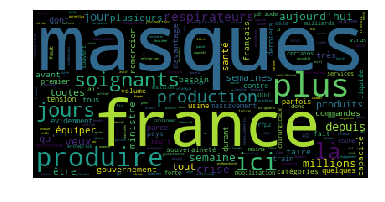

,Words,Frequency
0,masques,23
1,,22
2,france,14
3,plus,13
4,produire,13


In [22]:
print('Voici le WordCloud obtenu avec la troisième méthode pour le discours du Président le 31 mars :')
wordcloud('discoursmacron31mars', cleaner_text3)
dictionary_dataframe('discoursmacron31mars', cleaner_text3)

En effet, **le WordCloud est bien plus jolie** et ressemble déjà beaucoup plus à ce que nous pouvons voir sur internet. Mais de nouveaux problèmes apparaissent : un même verbe conjugué différement trois fois est interprété dans ce WordCloud comme trois mots différents n'ayant rien en commun (ici, le verbe produire et le mot production apparaissent alors qu'ils signifient la même chose). **Le WordCloud que nous avons obtenu n'est donc pas vraiment représentatif du texte en question**. 

Par exemple, dans la phrase "Mon père est confiné, ma mère est confinée et mes frères sont confinés", la méthode que nous avons attribuera à "est" le score le plus important, alors qu'il est flagrant que c'est ici "confiné" qui devrait l'avoir. 

Nous devons donc faire en sorte de **rassembler les mots désignants le même objet ou la même question** sous un seul. Pour cela, **il faut raciniser le texte**.

Mais d'abord, réalisons la rapide analye du coût algorithmique de ce programme. Il est déjà plus lent que les précédents programmes : cela est dû à la fonction replace_caractere qui parcourt le texte mot par mot.

In [23]:
debut = time.time()
dictionary_test = dictionary('discoursmacron16mars', cleaner_text3) 
fin = time.time()
print(f'Le coût algorithmique de la troisième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la troisième méthode est de 0.392 secondes pour 1000 mots


### 2.4. Quatrième méthode : l'ajout de la racinisation du texte.

Dans le premier essai, nous avions essayé de raciniser les mots de façon un petit peu aléatoire avec un Lemmatizer classique de la bibliothèque nltk. Mais après quelques recherches, **nous avons choisis d'utiliser un stemmer plus adapté à la langue française**. A la différence du Lemmatizer, le stemmer va seulement raciniser les mots. 

In [24]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

Créons rapidement une fonction qui reprend cleaner_text3 et lui applique le stemmer.

In [25]:
# Fonction auxiliaire :
def speech_stem(sentence):
    sentence_2 = ' '.join(sentence)
    doc = nlp(sentence_2)
    return [stemmer.stem(X.text) for X in doc]

# Fonction principale :
def cleaner_text4(speech):
    clean_speech_stem = cleaner_text3(speech)
    clean_speech_stem = speech_stem(clean_speech_stem)
    return clean_speech_stem

Voici ce que donne notre fonction cleaner_text4 qui nettoie (avec la fonction cleaner_text3) et racinise la texte pour les premières lignes du discours du Président le 31 mars 2020 :

In [26]:
cleaner_text4('discoursmacron31mars')[:10]

['bonjour',
 'tout',
 'tous',
 '   ',
 'voul',
 'adress',
 'depuis',
 'usin',
 'kolm',
 '-']

**Les mots sont bien racinisés !**

Bien entendu, **nous ne voulons pas de racines dans notre WordCloud**. C'est moche et parfois incompréhensible. Pour qu'un WordCloud soit parfait, il faudrait réussir à mettre tous les verbes à l'infinitif et tous les adjectifs au masculin singulier. Certains algorithme le font, comme l'algorithme de Porter, mais il est beaucoup trop compliqué d'en construire un en un temps si court. La solution que nous avons choisi, plus simple, est d'**attribuer à chaque racine son origine la plus fréquente**.

La première étape pour cela est de **créer un dictionnaire de dictionnaires**. Chaque racine différente de notre texte sera une clé de ce dictionnaire et constituera en elle même un dictionnaire dont les clés seront les différentes origines de cette racine et les valeurs attribuées le nombre de fois où elles apparaissent. Le programme sera tel que présenté ci-dessous. 

Un léger problème concernant la longueur de la liste racinisée en comparaison à la liste non racinisée nous pousse à enlever de potentiels caractères "parasites" qui faussent le dictionnaire.

In [27]:
def dictionary_of_dictionaries(speech, cleaner_text):
    cleaner_text_aux = lambda x: cleaner_text(x)
    words = cleaner_text3(speech)
    words_stem = cleaner_text_aux(speech)
    clean_words_stem = []
    caracteres_parasites = ["'","l'"]
    dictionary = {}
    keys_list = []
    final_dictionary = {}
    for i in range(len(words_stem)):
        if words_stem[i] not in caracteres_parasites:
            clean_words_stem.append(words_stem[i])
    for i in range(len(clean_words_stem)):
        if clean_words_stem[i] not in dictionary:
            dictionary[clean_words_stem[i]] = {}
            dictionary[clean_words_stem[i]][words[i]] = 1
        else:
            if words[i] not in dictionary[clean_words_stem[i]]:
                dictionary[clean_words_stem[i]][words[i]] = 1
            else:
                dictionary[clean_words_stem[i]][words[i]] = dictionary[clean_words_stem[i]][words[i]] + 1
    return dictionary

On peut ainsi afficher le dictionnaire de dictionnaires pour le discours du Président le 16 mars 2020.

In [28]:
dictionary_of_dictionaries('discoursmacron31mars', cleaner_text4)

{'bonjour': {'bonjour': 1},
 'tout': {'toutes': 6, 'toute': 3, 'tout': 6},
 'tous': {'tous': 4},
 '   ': {'  ': 2},
 'voul': {'voulais': 1},
 'adress': {'adresser': 1},
 'depuis': {'depuis': 8},
 'usin': {'usine': 4},
 'kolm': {'kolmi': 2},
 '-': {'-': 4},
 'hopen': {'hopen': 2},
 "saint-barthélémy-d'anjou": {"saint-barthélémy-d'anjou": 1},
 'dir': {'dire': 1},
 'fiert': {'fierté': 1},
 'être': {'être': 5},
 'là': {'là': 9},
 'côt': {'côté': 2},
 'dirig': {'dirigeants': 2},
 'salari': {'salariés': 2},
 'combat': {'combat': 2},
 'contr': {'contre': 4},
 'virus': {'virus': 3},
 'men': {'mener': 2},
 'soign': {'soignants': 9},
 'front': {'front': 1},
 'chaqu': {'chaque': 2},
 'jour': {'jour': 8, 'jours': 9},
 'pens': {'pense': 2, 'pensée': 1},
 'évident': {'évidemment': 4},
 'proteg': {'protéger': 1},
 'équip': {'équiper': 5, 'équipements': 1},
 'def': {'défi': 1},
 'connaisson': {'connaissons': 1},
 'début': {'début': 2},
 'lequel': {'lequel': 1},
 'premi': {'premier': 4, 'premières': 2,

Il faut ensuite **créer un nouveau dictionnaire** pour lequel les clés seront les clés ayant les plus gros scores dans les sous-dictionnaires du premier et la valeurs attribuée à chaque clé sera la somme des valeurs totales du sous-dictionnaire. 

Cela se fait en rajoutant sept lignes de codes à celui ci-dessus, **nous obtenons alors notre fonction finale de nettoyage et racinisation !**

On recrée ainsi la fonction dictionary qui redéfinit la fonction de la cellule 36 puis on pourra dessiner le WordCloud.

In [29]:
def dictionary(speech, cleaner_text):

    dictionary = dictionary_of_dictionaries(speech, cleaner_text)
    
    keys_list = []
    final_dictionary = {}
    for cle in dictionary:
        keys_list.append(cle)
    for i in range(len(keys_list)):
        inverse_i = [(value, key) for key, value in dictionary[keys_list[i]].items()]
        final_dictionary[max(inverse_i)[1]] = sum(dictionary[keys_list[i]].values())
        
    return final_dictionary

In [30]:
print(dictionary('discoursmacron31mars', cleaner_text4))

{'bonjour': 1, 'toutes': 15, 'tous': 4, '  ': 2, 'voulais': 1, 'adresser': 1, 'depuis': 8, 'usine': 4, 'kolmi': 2, '-': 4, 'hopen': 2, "saint-barthélémy-d'anjou": 1, 'dire': 1, 'fierté': 1, 'être': 5, 'là': 9, 'côté': 2, 'dirigeants': 2, 'salariés': 2, 'combat': 2, 'contre': 4, 'virus': 3, 'mener': 2, 'soignants': 9, 'front': 1, 'chaque': 2, 'jours': 17, 'pense': 3, 'évidemment': 4, 'protéger': 1, 'équiper': 6, 'défi': 1, 'connaissons': 1, 'début': 2, 'lequel': 1, 'premier': 8, 'ministre': 5, 'santé': 5, 'plusieurs': 5, 'membres': 1, 'gouvernement': 5, 'revenus': 2, 'derniers': 6, 'celui': 1, 'matières': 1, 'capacité': 8, 'donc': 3, 'aider': 2, 'abord': 2, 'masques': 23, 'chirurgicaux': 3, 'dit': 1, 'ffp2': 3, 'protection': 1, ' ': 22, 'savons': 1, 'difficultés': 2, 'rencontrées': 1, 'liées': 1, 'très': 5, 'forte': 3, 'augmenter': 2, 'consommation': 1, 'passés': 8, '4': 3, 'millions': 8, 'semaine': 13, '40': 3, 'peu': 1, 'près': 2, 'cela': 6, 'mis': 2, 'tension': 4, 'stocker': 2, 'exis

#### Comparaison de la complexité des deux fonctions créatrices du dictionnaire.

Ici, nous allons comparer la complexité de deux fonctions qui renvoient la même chose, un dictionnaire qui regroupe les mêmes racines sous une même origine sémantique et leur attribue un score, mais qui "bouclent" différement.

Ouvrons tout d'abord un discours d'E. Macron, celui du 16 mars, et affichons les deux fonctions à comparer.

In [31]:
with open('./discoursmacron16mars.txt','r') as f:
    speech_macron = f.read()

In [32]:
def dictionary_complexite1(speech):
    words = cleaner_text3(speech)
    words_stem = cleaner_text4(speech)
    clean_words_stem = []
    useless_characters = ["'","l'"]
    dictionary = {}
    keys_list = []
    final_dictionary = {}
    for i in range(len(words_stem)):
        if words_stem[i] not in useless_characters:
            clean_words_stem.append(words_stem[i])
    for i in range(len(clean_words_stem)):
        if clean_words_stem[i] not in dictionary:
            dictionary[clean_words_stem[i]] = {}
            dictionary[clean_words_stem[i]][words[i]] = 1
        else:
            if words[i] not in dictionary[clean_words_stem[i]]:
                dictionary[clean_words_stem[i]][words[i]] = 1
            else:
                dictionary[clean_words_stem[i]][words[i]] = dictionary[clean_words_stem[i]][words[i]] + 1
    for cle in dictionary:
        keys_list.append(cle)
    for i in range(len(keys_list)):
        inverse_i = [(value, key) for key, value in dictionary[keys_list[i]].items()]
        final_dictionary[max(inverse_i)[1]] = sum(dictionary[keys_list[i]].values())
    return final_dictionary

In [33]:
def dictionary_complexite2(speech):
    words = cleaner_text3(speech)
    words_stem = cleaner_text4(speech)
    clean_words_stem = []
    useless_characters = ["'","l'"]
    dictionary = {}
    keys_list = []
    final_dictionary2 = {}
    for i in range(len(words_stem)):
        if words_stem[i] not in useless_characters:
            clean_words_stem.append(words_stem[i])
    for i in range(len(clean_words_stem)):
        if clean_words_stem[i] not in dictionary:
            dictionary[clean_words_stem[i]] = {}
            for j in range(len(words)):
                if clean_words_stem[j] == clean_words_stem[i]:
                    if words[j] not in dictionary[clean_words_stem[i]]:
                        dictionary[clean_words_stem[i]][words[j]] = 1
                    else:
                        dictionary[clean_words_stem[i]][words[j]] = dictionary[clean_words_stem[i]][words[j]] + 1
    for key in dictionary:
        keys_list.append(key)
    for i in range(len(keys_list)):
        inverse_i = [(value, key) for key, value in dictionary[keys_list[i]].items()]
        final_dictionary2[max(inverse_i)[1]] = sum(dictionary[keys_list[i]].values())    
    return final_dictionary2

Le premier algorithme procède de la façon suivante :
* il parcourt **en même temps** la liste des racines et la liste des mots entiers nettoyés.
* Si la racine sur laquelle il tombe n'est pas déjà une clé du dictionnaire (au départ vide), il crée un dictionnaire vide dont la clé est cette racine. Il crée ensuite une nouvelle clé à l'intérieur de ce dictionnaire qui est le mot du même indice que la racine mais dans la liste des mots entiers et lui attribue la valeur 1.
* Si la racine sur laquelle il tombe est déjà une clé du dictionnaire avec un dictionnaire attribué, il parcours le dictionnaire pour voir si le mot vis à vis de la racine dans la liste words est une clé du dictionnaire. Il ajoute 1 à la valeur de cette clé si c'est le cas et si ce n'est pas le cas, il crée un dictionnaire dont la clé est le mot vis à vis de la racine et lui attribue la valeur 1.
* Il regarde ensuite pour chaque dictionnaire à l'intérieur du dictionnaire quelle est la clé qui a la valeur la plus importante et fait d'elle une clé dans dictionnaire_final ayant comme valeur la somme des valeurs du dictionnaire dont elle était une clé. 

Le second algorithme procède de la façon suivante :
* Il parcours d'abord la liste clean_words_stem. 
* A chaque racine de la liste, il regarde si elle est une clé du dictionnaire au départ vide. Si ce n'est pas le cas, il en crée une et lui associe un dictionnaire vide. Si c'est le cas, on passe à la racine suivante. 
* Il parcours ensuite une nouvelle fois la liste clean_words_stem et à chaque fois qu'il tombera sur une racine identique, il regardera le mot vis à vis dans la liste words et ajoutera une clé en associant la valeur 1 s'il n'est pas déjà une clé du dictionnaire associé à la racine et ajoutera 1 à la valeur de cette clé si elle existe déjà, en suivant le même processus que l'étape trois du premier algorithme. 
* Il regarde ensuite pour chaque dictionnaire à l'intérieur du dictionnaire quelle est la clé qui a la valeur la plus importante et fait d'elle une clé dans dictionnaire_final ayant comme valeur la somme des valeurs du dictionnaire dont elle était une clé. 

Avec cette description, on comprend que **le premier algorithme devrait être moins coûteux que le second** puisque moins de boucle sont nécessaire (il parcours les listes moins de fois). Comparons tout de même de manière rigoureuse. La dernière étape étant la même pour les deux fonctions, nous ne la ferons pas entrer en compte dans la comparaison des coûts. De même pour la première étape (retrait des caractères parasites ou inutiles), qui est aussi présente dans les deux fonctions.

Notons $n$ la taille de words et de clean_words_stem.

Complexité de la première fonction :
* Coût du parcours en même temps de clean_words_stem et words : $n$.
* Parcours du dictionnaire dans le pire des cas : $n-a$ (avec $a$ = nombre de doublons de racines dans la liste clean_words_stem) ce qui revient à une complexité de l'ordre de $n$.
On a donc une complexité de l'ordre de $n^2$ pour le premier algorithme.

Complexité de la seconde fonction :
* Coût du parcours de clean_words_stem dans le pire des cas : $n$.
* Coût du parcours de clean_words_stem dans le pire des cas pour la deuxième fois : $n$.
* Coût du parcours du dictionnaire dans le pire des cas : $n-a$ (avec $a$ = nombre de doublons de racines dans la liste clean_words_stem) ce qui revient à une complexité de l'ordre de $n$.
On a donc une complexité de l'ordre de $n^3$ pour le second algorithme.

**Comme prévu, le second algorithme est plus coûteux !**

Jettons un oeil au temps d'éxécution pour vérifier cela.

In [34]:
import time
# Pour le premier algorithme
start_time = time.time()
dictionary_test = dictionary_complexite1('discoursmacron16mars')
print(f"Le temps d'éxécution de la première fonction est de {round((time.time() - start_time),3)}.")

Le temps d'éxécution de la première fonction est de 0.8.


In [35]:
import time
# Pour le premier algorithme
start_time = time.time()
dictionary_test = dictionary_complexite2('discoursmacron16mars')
print(f"Le temps d'éxécution de la deuxième fonction est de {round((time.time() - start_time),3)}.")

Le temps d'éxécution de la deuxième fonction est de 0.766.


Terminons ici cette parenthèse sur la complexité. Nous avons donc obtenu **un nouveau dictionnaire avec les mots regroupés par origine sémantique**. Voyons ce que cela nous donne comme WordCloud.

Nous affichons aussi la liste des cinq mots les plus importants dans le discours du Président le 31 mars 2020 avec cette nouvelle méthode grâce à **la fonction dictionary_dataframe**.

Voici le WordCloud obtenu avec la quatrième méthode pour le discours du Président le 31 mars 2020 :


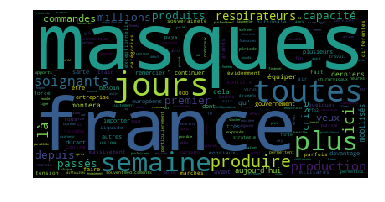

,Words,Frequency
0,masques,23
1,,22
2,france,19
3,jours,17
4,toutes,15


In [36]:
print('Voici le WordCloud obtenu avec la quatrième méthode pour le discours du Président le 31 mars 2020 :')
wordcloud('discoursmacron31mars', cleaner_text4)
dictionary_dataframe('discoursmacron31mars', cleaner_text4)

**Ce WordCloud est plutôt bien réussi !**

Seulement, on observe que des mots comme "aussi" et "cette" ont de l'importance alors qu'ils n'apportent pas de signification particulière au texte. Il faut alors trouver un moyen de diminuer leur importance : **c'est la méthode TF-IDF**.

Mais d'abord, faisons une rapide analyse du coût algorithmique de ce programme. **Il est très lent !** Cela est dû à la fonction qui crée un dictionnaire de dictionnaires.

In [37]:
debut = time.time()
dictionary_test = dictionary('discoursmacron16mars', cleaner_text4)
fin = time.time()
print(f'Le coût algorithmique de la quatrième méthode est de {round(1000 * ((fin - debut) / len(dictionary_test)),3)} secondes pour 1000 mots')

Le coût algorithmique de la quatrième méthode est de 1.052 secondes pour 1000 mots


### 2.5. Cinquième méthode : la méthode de pondération TF-IDF.

La méthode TF-IDF permet de **pondérer la fréquence des mots dans le texte par une moyenne représentative de leur usage dans la langue française à partir d'un corpus de texte assez large**.

1) **La partie TF** calcule une fonction croissante de la fréquence du terme de recherche dans le document à l’étude,

2) **la partie IDF** calcule une fonction inversement proportionnelle à la fréquence du terme dans l’ensemble du corpus représentatif de la langue française.

Ainsi, en multipliant les deux composantes, **on obtient un score d’autant plus élevé que le terme est surréprésenté dans un texte par rapport à son utilisation usuelle dans la langue française**.

Soit, la formule suivante : 

$score TF-IDF = term-frequency-text * log( 1 /  term-frequency-corpus )$

Où : 

* term-frequency-text est la fréquence du mot dans le texte (ici, le discours), **la partie TF**.

* term-frequency-corpus est la fréquence du mot dans le corpus (ici, le corpus de discours), pour calculer **la partie IDF**.

**On choisit de prendre un corpus formé des discours du gouvernement tout le long de la crise**. Nous reviendrons sur ce choix dans la dernière partie, mais cela nous permettra d'analyser l'évolution de certains mots dans les discours du Président E. Macron au cours de la crise. Par exemple, l'utilisation du mot "masque" est-elle de plus en plus importante dans les discours au fur et à mesure de la progression de l'épidémie ? Le mot crise est-il toujours aussi employé ? Voit-on apparaître des préoccupations financières avec le confinement qui paralyse l'économie du pays ?

On définit donc les fonctions :

* **number_key_words** qui calcule le nombre de clés dans un dictionnaire.

* **tf_dictionary** qui prend en appel un mot du discours, le dictionnaire du discours, le nombre de clés dans ce dictionnaire et retourne la fréquence de son utilisation dans le discours,

* **idf_dictionary** qui prend en appel un mot, le dictionnaire du corpus de discours, le nombre de clés dans ce dictionnaire et retourne la fréquence de son utilisation dans le corpus de discours,

* **score_tfidf_dictionary** qui prend en appel un mot, les dictionnaires du discours dont on veut tracer le WordCloud et du corpus de discours, les nombres de clés dans ces dictionnaires et retourne le score TF-IDF conformément à la formule du mot du discours,

* **tfidf_dictionary** qui prend en appel un texte et le corpus de texte et retourne le dictionnaire élaboré avec la quatrième méthode de nettoyage et de racinisation.

In [38]:
from math import log

def number_key_words(dictionary):
    total = 0
    for key in dictionary:
        total += dictionary.get(key)
    return total

def tf_dictionary(word, text_dictionary, total_key_words_text):
    return text_dictionary[word] / total_key_words_text

def idf_dictionary(word, corpus_dictionary, total_key_words_corpus):
    if word not in corpus_dictionary:
        return 0
    else:
        return log(total_key_words_corpus / corpus_dictionary[word])
    
def score_tfidf_dictionary(word, text_dictionary, total_key_words_text, corpus_dictionary, total_key_words_corpus):
    return tf_dictionary(word, text_dictionary, total_key_words_text) * idf_dictionary(word, corpus_dictionary, total_key_words_corpus)

def tfidf_dictionary(text, corpus):
    final_dictionary = {}
    text_dictionary = dictionary(text, cleaner_text4)
    corpus_dictionary = dictionary(corpus, cleaner_text4)
    total_key_words_text = number_key_words(text_dictionary)
    total_key_words_corpus = number_key_words(corpus_dictionary)
    for word in text_dictionary:
            final_dictionary[word] = score_tfidf_dictionary(word, text_dictionary, total_key_words_text, corpus_dictionary, total_key_words_corpus)
    return final_dictionary

On analyse le coût algorithmique de cette nouvelle méthode. Cela peut prendre beaucoup de temps... Comme la méthode TF-IDF doit aussi parcourir un corpus très large, **cela augmente considérablement le coût algorithmique**.

In [39]:
debut0 = time.time()
dictionary_test = tfidf_dictionary('discoursmacron16mars', 'corpusdiscoursmacron')
fin0 = time.time()
coût0 = round(1000 * ((fin0 - debut0) / len(dictionary_test)),3)
print(f'Le coût algorithmique de la cinquième méthode est de {coût0} secondes pour 1000 mots')

Le coût algorithmique de la cinquième méthode est de 7.761 secondes pour 1000 mots


**C'est exceptionnellement long !** 

Ce qui est paradoxal, c'est que **le résultat est d'autant plus précis que le corpus est large donc, par conséquent, que l'algorithme est lourd**.

On crée désormais le WordCloud associé à cette nouvelle méthode. Il nous faut, pour cela, définir **une nouvelle fonction wordcloud_tf_idf**.

Voici le WordCloud obtenu avec la cinquième méthode pour le discours du Président le 31 mars 2020 (cela peut prendre un peu de temps...) :


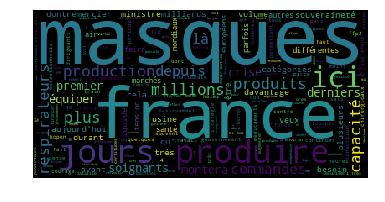

In [40]:
def wordcloud_tf_idf(speech_name):
    wordcloud = WordCloud(max_font_size = 100)
    wordcloud.generate_from_frequencies(dict(tfidf_dictionary(speech_name, 'corpusdiscoursmacron')))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print('Voici le WordCloud obtenu avec la cinquième méthode pour le discours du Président le 31 mars 2020 (cela peut prendre un peu de temps...) :')
wordcloud_tf_idf('discoursmacron31mars')

**Ce WordCloud est celui que nous voulions au départ !**

On constate que, par rapport à la version précédente, **des mots pas très intéressants comme "toutes" et "plus" perdent en importance car ils sont pénalisés par la méthode TF-IDF** tandis que d'autres, plus significatifs, comme "produire" et "jours" sont valorisés !

Nous pouvons aussi obtenir un WordCloud avec **une autre méthode TF-IDF** dont nous détaillons le code ci-dessous. Si la partie TF reste la même, c'est la partie IDF qui change. En effet, il ne s'agit plus de pondérer la fréquence du terme dans discours par sa fréquence dans le corpus de discours mais par **le nombre de fois discours dans lesquels il apparaît** à l'aide des fonctions **speech_containing_word** (qui regarde si le discours contient le mot) et **score_idf** (qui calcule une fonction inverse de la fréquence du terme dans les discours).

In [41]:
# Fonctions auxiliaires : la fonction number_key_words existe déjà

def score_tf(word, text_dictionary, total_key_words_text):
    return text_dictionary[word] / total_key_words_text

def speech_containing_word(word, date, month):
    with open(f'./discoursmacron{date}{month}.txt','r', encoding = 'utf-8') as f:
        speech = f.read()
    speech = speech.split()  
    if word in speech:
        return True

def score_idf(word):
    number_of_speech_containing_word = 0
    march  = [12, 16, 25, 31]
    april = [13]
    number_of_speech = len(march) + len(april)
    for date in march:  
        if speech_containing_word(word, date, "mars") is True:
            number_of_speech_containing_word += 1
    for date in april: 
        if speech_containing_word(word, date, "avril") is True:
            number_of_speech_containing_word += 1
    if number_of_speech_containing_word == 0:
        return 0
    else:
        return log(number_of_speech / number_of_speech_containing_word)

def score_tfidf(word, text_dictionary, total_key_words_text):
    return score_tf(word, text_dictionary, total_key_words_text) * score_idf(word)

# Fonction princiale :

def tfidf_dictionary2(text):
    final_dictionary = {}
    text_dictionary = dictionary(text, cleaner_text4)
    total_key_words_text = number_key_words(text_dictionary)
    for word in text_dictionary:
            final_dictionary[word] = score_tfidf(word, text_dictionary, total_key_words_text)
    return final_dictionary

Voici le WordCloud obtenu avec la deuxième formule TF-IDF pour le discours du Président le 31 mars 2020 (cela peut prendre un peu de temps...) :


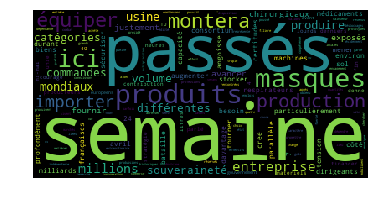

In [42]:
def wordcloud_tf_idf2(speech_name):
    wordcloud = WordCloud(max_font_size = 100)
    wordcloud.generate_from_frequencies(dict(tfidf_dictionary2(speech_name)))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print('Voici le WordCloud obtenu avec la deuxième formule TF-IDF pour le discours du Président le 31 mars 2020 (cela peut prendre un peu de temps...) :')
wordcloud_tf_idf2('discoursmacron31mars')

On constate que **cette deuxième formule de TF-IDF met en avant d'autres mots par rapport à la première** (ceux de la première apparaissent quand même). D'après notre ressenti, ces mots ne sont pas les plus pertinents. Seulement, nous sommes convaincus que cette méthode peut être intéressante, à condition d'avoir **un corpus de textes beaucoup plus large** (car cinq textes, ça n'est pas suffisant pour cette méthode). Par exemple, nous pourrions inclure dans le corpus **tous les discours du gouvernement dans la crise**. Dès lors, nous n'aurions très probablement pas eu à inclure les termes "cette" et "aussi" dans les stopwords...

En outre, cette deuxième formule est sensiblement plus rapide que la première pour la même taille de corpus.

Enfin, **nous retenons la première formule pour passer à la troisième partie** dans laquelle nous interprétons et analysons les résultats.

## 3. Analyse des résultats et interprétation.

### 3.1. Comparaison avec l’algorithme de A. Mueller et regard critique sur notre programme.

On peut **comparer avec l'algorithme de A. Mueller** (Research Scientist, Columbia Data Science Institute), l'algorithme "officiel" de la bibliothèque wordcloud disponible sur Conda. Voici **la fonction wordcloud_comparison** qui prend en appel le nom d'un texte et ressort le WordCloud de A. Mueller et le notre pour les comparer.

Cette fonction est un peu lente. Nous allons voir si cela est aussi du à l'algorithme de A.Mueller...

In [43]:
def wordcloud_comparison(speech_name):
    
    # L'algorithme de Mueller génère un WordCloud à partir de la chaîne de caractères "speech"
    debutM = time.time()
    speech = f'./{speech_name}.txt'
    with open(speech, 'r', encoding = 'utf-8') as f:
        speech = f.read()
    
    stopwords_fr_ntlk = nltk.corpus.stopwords.words('french')
    wordcloud = WordCloud(stopwords = stopwords_fr_ntlk, background_color = "white")
    wordcloud.generate(speech)
    plt.imshow(wordcloud)
    plt.axis('off')
    finM = time.time()
    timeM = round(finM - debutM, 3)
    print(f'Le programme de Mueller met {timeM} secondes pour afficher le WordCloud du discours.')
    
    debutBV = time.time()
    wordcloud_tf_idf(speech_name)
    finBV = time.time()
    timeBV = round(finBV - debutBV, 3)
    print(f'Notre programme met {timeBV} secondes pour afficher le WordCloud du discours.')
    print()
    print(f'Le programme de Mueller est donc {round(timeBV / timeM, 2)} fois plus efficace que le notre...')

Le programme de Mueller met 0.18 secondes pour afficher le WordCloud du discours.


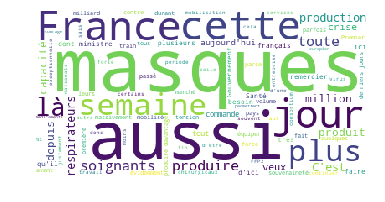

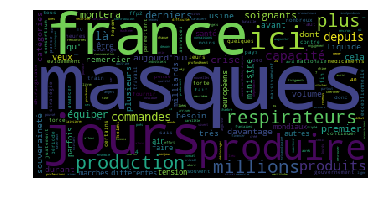

Notre programme met 4.46 secondes pour afficher le WordCloud du discours.

Le programme de Mueller est donc 24.78 fois plus efficace que le notre...


In [44]:
wordcloud_comparison('discoursmacron31mars')

Quand on compare avec l'algorithme de Mueller (celui en fond blanc), on se rend compte que **le notre n'est pas mal du tout** ! Il semblerait même que **la méthode TF-IDF** mise en place nous ait permis d'éliminer certains petits mots inutiles en plus comme "aussi" et "cette", qui apparaîssent avec un gros score dans le premer WordCloud et un plus petit dans le notre. 

Par contre, **l'algorithme de Mueller accorde plus de soin au processus de racinisation par origine sémantique**, "France" ayant, par exemple, conservé sa majuscule et certains mots étant repassés à l'infinitif...

Enfin, on constate bien que **nous obtenons un WordCloud plus précis** mais **au prix d'un coût algorithmique démultiplié** !

### 3.2. Analyse de l'évolution des discours du Président de la République pendant l'épidémie de Covid-19.

Comme nous l'avions dit au début, l'objectif de ce projet était d'arriver à **cerner l'évolution de la stratégie de communication d'Emmanuel Macron** tout au long de la crise du Covid-19. Avec cette méthode de création de WordCloud, nous devrions être capable de visualiser clairement sur quels mots il a choisis d'insister et à quel moment. 

Pour cela, jettons un oeil à tous les WordCloud de ses discours.

Voici le WordCloud du discours du Président E. Macron le 12 mars 2020 :


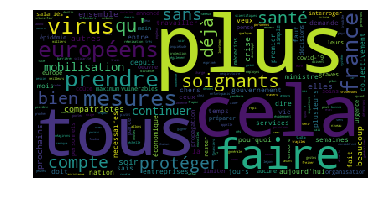

Voici le WordCloud du discours du Président E. Macron le 16 mars 2020 :


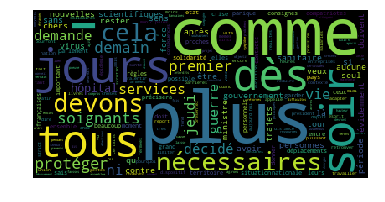

Voici le WordCloud du discours du Président E. Macron le 25 mars 2020 :


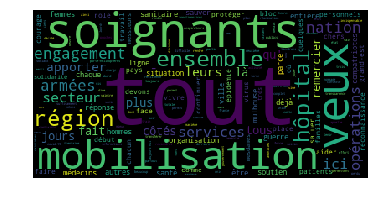

Voici le WordCloud du discours du Président E. Macron le 31 mars 2020 :


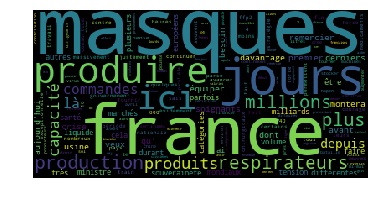

Voici le WordCloud du discours du Président E. Macron le 13 avril 2020 :


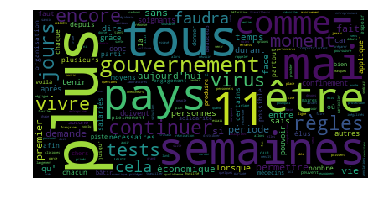

In [45]:
print('Voici le WordCloud du discours du Président E. Macron le 12 mars 2020 :')
wordcloud_tf_idf('discoursmacron12mars')
  
print('Voici le WordCloud du discours du Président E. Macron le 16 mars 2020 :')
wordcloud_tf_idf('discoursmacron16mars')

print('Voici le WordCloud du discours du Président E. Macron le 25 mars 2020 :')
wordcloud_tf_idf('discoursmacron25mars')

print('Voici le WordCloud du discours du Président E. Macron le 31 mars 2020 :')
wordcloud_tf_idf('discoursmacron31mars')

print('Voici le WordCloud du discours du Président E. Macron le 13 avril 2020 :')
wordcloud_tf_idf('discoursmacron13avril')

Ces WordCloud sont bien représentatifs de ce que nous avons pu entendre !

Au début de la crise, il insiste sur **les risques que représente le virus aux niveaux français et européen**. On voit ainsi apparaître dans le WordCloud de son discours du 12 mars les termes "virus" et "santé" qui sont les préoccupations principales du moment qui appellent à **"prendre" des "mesures"**.

Dans son discours du 16 mars, le Président E. Macron insiste sur **la nécessité de se protéger** (le terme "protéger" apparaît) et accorde une place importante aux soignants. Il prend alors réelleement conscience de **la gravité de la situation**, comme on peut le voir avec **le mot "guerre"** (avec sa fameuse répétition de la phrase **"nous sommes en guerre"**), qui ressort beaucoup dans ce deuxième discours. 

Le 25 mars, deux semaines après le début de la crise, son discours sonne comme **un appel à l'aide**, ce qui en est presque inquiétant. Ce sont les mots comme "soignants", "mobilisations", "armés", "hôpital" ou "nations" qui ressortent. **E. Macron est inquiet** et le fait savoir. **Nous sommes au point culminant de la crise et cela se ressent dans ce WordCloud**.

Ensuite, le problème des masques apparaissant, il martèle le mot dans son discours du 31 mars. Insistant aussi sur **l'effort de production français**. Il cherche probablement à se **régler le problème de gestion des stocks de masques** qui a été reproché à son gouvernement. 

Enfin, les mots qui ressortent lors du dernier discours sont moins frappants. On sent que **le language alarmiste est derrière** et qu'E. Macron veut que les Français regardent **vers le déconfinement** (on voit apparaître les termes "11" et "mai") avec une volonté de "continuer" à combattre ce virus avec des "règles". Il anticipe également **le monde d'après** (il emploie le terme "vivre" et le futur avec "faudra").

Nous pouvons désormais nous concentrer sur **l'évolution de l'emploi de certains mots en particulier** dans son discours avec une autre possibilité de représentation graphique grâce **aux bibliothèques pywaffle et pandas** que nous importons.

Cette dernière partie sort du contexte des WordCloud mais nous permet d'affiner et de confirmer notre analyse.

In [46]:
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

import pandas as pd

In [48]:
def particular_word_evolution(word):

    # Nous créons un dictionnaire data où on a le nom du discours en clé et le nombre d'occurence du mot en valeur
    speeches = ('discoursmacron12mars', 'discoursmacron16mars', 'discoursmacron25mars', 'discoursmacron31mars', 'discoursmacron13avril')
    data = {}
    for speech in speeches:
        aux = dictionary(speech, cleaner_text4)
        if word not in aux:
            data[speech] = 0
        else:
            data[speech] = aux[word]
            
    # on veut représenter graphiquement l'évolution de la fréquence du mot dans le temps
    fig = plt.figure(
        FigureClass = Waffle, 
        rows = 3, 
        values = data, 
        title = {'label' : f"Utilisation du mot '{word}' au cours de l'épidémie de Covid-19 :"},
    );

On constate que le mot "masque" a pris une importance conséquente au cours du temps avec un pic lors du discours du 31 mars.


//anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


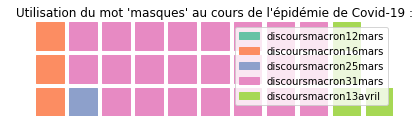

In [49]:
particular_word_evolution('masques')
print('On constate que le mot "masque" a pris une importance conséquente au cours du temps avec un pic lors du discours du 31 mars.')

Nous constatons que l'utilisation du mot 'crise' a surtout été importante au début de l'épidémie et qu'elle a diminué ensuite avant de réapparaître le 31 mars dans un contexte un peu particulier car cela est lié à la mauvaise gestion des stocks de masque.


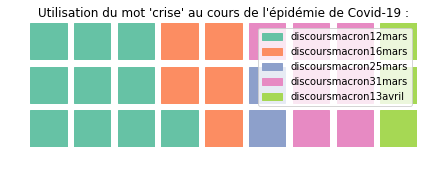

In [51]:
particular_word_evolution('crise')

print("Nous constatons que l'utilisation du mot 'crise' a surtout été importante au début de l'épidémie et qu'elle a diminué ensuite avant de réapparaître le 31 mars dans un contexte un peu particulier car cela est lié à la mauvaise gestion des stocks de masque.")

Pour conclure, **nous sommes plutôt satisfaits** et avons réussi à **avoir un WordCloud représentatif** pour chaque discours nous fournissant **de nombreuses informations pertinentes à exploiter**.

Merci pour votre attention !